# MBA Admissions Data Analysis and Preprocessing
### by Seyedvala Khorasani
#### September 2024


## import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## Read in data 

In [2]:
df=pd.read_csv('/kaggle/input/mba-admission-dataset/MBA.csv')
print(df.head())
print(df.describe())


   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  
       application_id          gpa         gmat     work_exp
count     6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952
std       1788.198115     0.151541    49.294883     1.032432

## Converting Categorical Data to Numerical Format

In [3]:
df['admission'] = df['admission'].replace({'Admit': 1, 'Waitlist': 2})
df['admission'] = df['admission'].fillna(0)
df['admission'].value_counts()



/tmp/ipykernel_17/17098316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = df['admission'].replace({'Admit': 1, 'Waitlist': 2})


admission
0.0    5194
1.0     900
2.0     100
Name: count, dtype: int64

array([[<Axes: title={'center': 'admission'}>]], dtype=object)

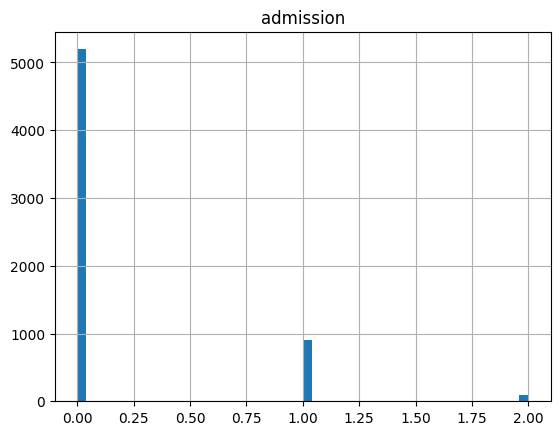

In [4]:
df.hist(column='admission', bins=50)

In [5]:
categorical_columns = ['gender', 'major', 'race', 'work_industry']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,application_id,international,gpa,gmat,work_exp,admission,gender_Female,gender_Male,major_Business,major_Humanities,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,False,3.30,620.0,3.0,1.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,3.28,680.0,5.0,0.0,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2,3,True,3.30,710.0,5.0,1.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,False,3.47,690.0,6.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,False,3.35,590.0,5.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6190,False,3.49,640.0,5.0,0.0,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
6190,6191,False,3.18,670.0,4.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6191,6192,True,3.22,680.0,5.0,1.0,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
6192,6193,True,3.36,590.0,5.0,0.0,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False


In [6]:
X = df_encoded[['gpa', 'gmat', 'work_exp', 'admission', 
                'gender_Female', 'gender_Male', 'major_Business', 
                'major_Humanities', 'work_industry_Health Care', 
                'work_industry_Investment Banking', 
                'work_industry_Investment Management',
                'work_industry_Media/Entertainment', 
                'work_industry_Nonprofit/Gov', 'work_industry_Other', 
                'work_industry_PE/VC', 'work_industry_Real Estate', 
                'work_industry_Retail', 'work_industry_Technology']].values
X


array([[3.3, 620.0, 3.0, ..., False, False, False],
       [3.28, 680.0, 5.0, ..., False, False, False],
       [3.3, 710.0, 5.0, ..., False, False, True],
       ...,
       [3.22, 680.0, 5.0, ..., False, False, False],
       [3.36, 590.0, 5.0, ..., False, False, False],
       [3.23, 650.0, 4.0, ..., False, False, False]], dtype=object)

In [7]:
y=df[['admission']].values
y


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

## Normalizing the data

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.32526081, -0.6308059 , -1.95375019,  1.94742642,  1.32350517,
        -1.32350517,  1.53946983, -0.81743063, -0.23873958, -0.32142362,
        -0.16594624, -0.09806606, -0.34270312, -0.27004757, -0.41418941,
        -0.13508359, -0.07318657, -0.36153096],
       [ 0.19327277,  0.58645722, -0.0164207 , -0.42052789, -0.7555694 ,
         0.7555694 , -0.64957428,  1.2233454 , -0.23873958, -0.32142362,
         6.02604788, -0.09806606, -0.34270312, -0.27004757, -0.41418941,
        -0.13508359, -0.07318657, -0.36153096],
       [ 0.32526081,  1.19508879, -0.0164207 ,  1.94742642,  1.32350517,
        -1.32350517,  1.53946983, -0.81743063, -0.23873958, -0.32142362,
        -0.16594624, -0.09806606, -0.34270312, -0.27004757, -0.41418941,
        -0.13508359, -0.07318657,  2.76601482],
       [ 1.44715914,  0.78933441,  0.95224405, -0.42052789, -0.7555694 ,
         0.7555694 , -0.64957428, -0.81743063, -0.23873958, -0.32142362,
        -0.16594624, -0.09806606, -0.34270312, -0.270

## test train split and Fitting the model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4955, 18) (4955, 1)
Test set: (1239, 18) (1239, 1)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_train = y_train.squeeze()
neigh.fit(X_train, y_train)
yhat = neigh.predict(X_test)





/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## evaluating the model

In [11]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9935418768920282
Test set Accuracy:  0.9887005649717514


## Visualizing True labels vs Predicted labels

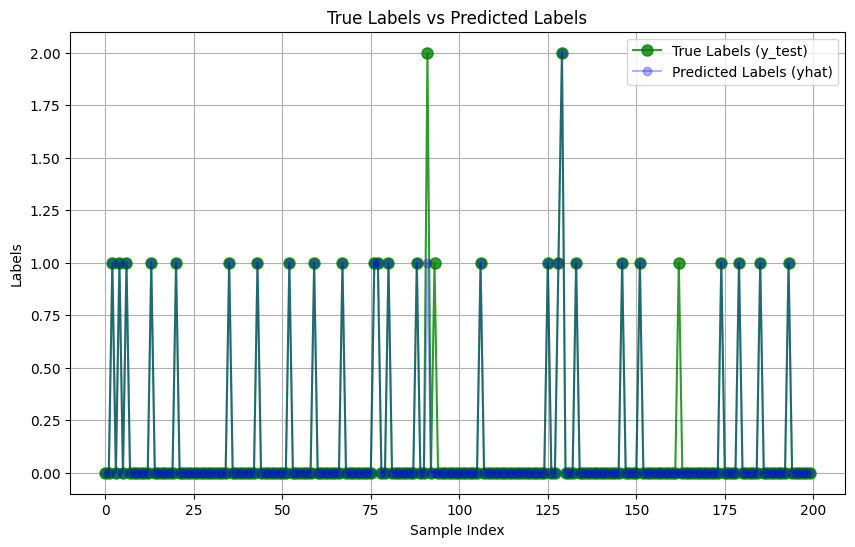

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Converting the arrays to 1D for plotting (in case they're not already)
y_test_flat = np.array(y_test).flatten()
yhat_flat = np.array(yhat).flatten()

# Plotting the first 20 values for comparison with lower alpha for the green line
plt.figure(figsize=(10, 6))
plt.plot(y_test_flat[0:200], 'go-', label='True Labels (y_test)', markersize=8, alpha=0.8)  # Reduced alpha for visibility
plt.plot(yhat_flat[0:200], 'bo-', label='Predicted Labels (yhat)', markersize=6,alpha=0.3)

plt.title('True Labels vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Labels')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
y_test_flat = np.array(y_test).flatten()
yhat_flat = np.array(yhat).flatten()

# Compare true labels and predicted labels
correct_predictions = np.sum(y_test_flat == yhat_flat)
incorrect_predictions = np.sum(y_test_flat != yhat_flat)

# Print results
print(f'Number of correct predictions: {correct_predictions}')
print(f'Number of incorrect predictions: {incorrect_predictions}')

# Optional: Calculate accuracy as well
accuracy = correct_predictions / len(y_test_flat)
print(f'Accuracy: {accuracy * 100:.2f}%')

Number of correct predictions: 1225
Number of incorrect predictions: 14
Accuracy: 98.87%
